#### K-Means Clustering

Grouping n observations into k clusters

* Elect k random observation as centers for the clusters (First k obersvations for example)
* Calculate the Euclidean Distance of each observation from the centers
* Euclidean Distance (Observation, Center) = sqrt((Ox - Cx)² + (Oy - Cy)²)
* Assign each observation to the cuslter of the nearset center
* Calcuate the new center of the culster (mean(x), mean(y))
* Repeat (distances, assign, new centers)

In [1]:
import pandas as pd

data = pd.read_csv("datasets/shopping.csv")

data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


#### Columns to cluster

In [2]:
x = data.drop(columns = ["CustomerID"])

x = x.rename(columns = {
  "Annual Income (k$)": "income",
  "Spending Score (1-100)": "score"
})

In [3]:
x.describe()

,income,score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


#### Scale Values

Clustering depends on calculation distances between examples, so we need to scale the income to the range 1-99 (MinMax of spending score)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1, 99))

tx = scaler.fit_transform(x)

x["income"] = tx[:, 0]
x["score"] = tx[:, 1]

x.head()

,income,score
0,1.000000,39.0
1,1.000000,81.0
2,1.803279,6.0
3,1.803279,77.0
4,2.606557,40.0


#### Best K Value based on Cluster Quality

silhouette score = **bad** < 0.25 =< **fair** >= 0.5 < **good** 

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_range = [2, 3, 4, 5, 6, 7, 8]
best_cluster = 0
best_cluster_score = 0

for n_clusters in n_clusters_range:
  model = KMeans(n_clusters = n_clusters)
  model.fit(x)

  # labels_ represents cluster index for each observation
  score = silhouette_score(x, model.labels_)

  if score > best_cluster_score:
    best_cluster = n_clusters
    best_cluster_score = score

  print("clusters:", n_clusters, "score:", score, "best_cluster:", best_cluster)

clusters: 2 score: 0.33340205479864793 best_cluster: 2
clusters: 3 score: 0.4483234817839331 best_cluster: 3
clusters: 4 score: 0.497150662397101 best_cluster: 4
clusters: 5 score: 0.5602436353869122 best_cluster: 5
clusters: 6 score: 0.4512286938427137 best_cluster: 5
clusters: 7 score: 0.5099979252600282 best_cluster: 5
clusters: 8 score: 0.48815126637056494 best_cluster: 5


In [6]:
model = KMeans(n_clusters = best_cluster, random_state = 0)

model.fit(x)

KMeans(n_clusters=5, random_state=0)

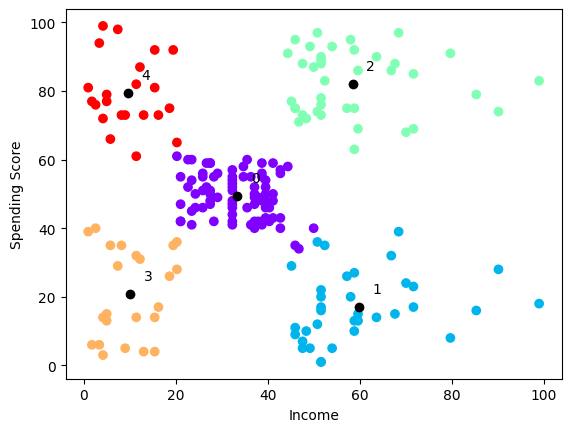

In [10]:
import matplotlib.pyplot as plt

# labels_ represents cluster index for each observation
plt.scatter(x["income"], x["score"], c = model.labels_, cmap = "rainbow")
plt.xlabel("Income")
plt.ylabel("Spending Score")

# plot centers
centers_x = model.cluster_centers_[:, 0]
centers_y = model.cluster_centers_[:, 1]
plt.scatter(centers_x, centers_y, color = "black")

# show cluster index for each center
for i in range(best_cluster):
  plt.annotate(i, xy = (centers_x[i], centers_y[i]), textcoords = "offset points", xytext = (10, 10))

#### Filter Customers (High Income, High Spending Score)

In [11]:
customer_cluster_data = pd.DataFrame()

customer_cluster_data["customer_id"] = data["CustomerID"]
customer_cluster_data["cluster"] = model.labels_
customer_cluster_data[customer_cluster_data["cluster"] == 2]

,customer_id,cluster
123,124,2
125,126,2
127,128,2
129,130,2
131,132,2
133,134,2
135,136,2
137,138,2
139,140,2
141,142,2
